In [1]:
import pandas as pd 
from sklearn.feature_selection import RFECV
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

import warnings
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import anderson
from sklearn.model_selection import train_test_split
from scipy.stats import mannwhitneyu
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import os
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data = pd.read_csv('frauddetection/creditcard.csv')
print(data.head())
print(data['Class'].value_counts())
print(data.columns)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
X = data[['V27', 'V4', 'V10', 'V14', 'V28', 'V20', 'V21', 'V16', 'V13', 'V24']]
y = data['Class']

In [4]:
X.head()


V27        V4       V10       V14       V28       V20       V21  \
0  0.133558  1.378155  0.090794 -0.311169 -0.021053  0.251412 -0.018307   
1 -0.008983  0.448154 -0.166974 -0.143772  0.014724 -0.069083 -0.225775   
2 -0.055353  0.379780  0.207643 -0.165946 -0.059752  0.524980  0.247998   
3  0.062723 -0.863291 -0.054952 -0.287924  0.061458 -0.208038 -0.108300   
4  0.219422  0.403034  0.753074 -1.119670  0.215153  0.408542 -0.009431   

        V16       V13       V24  
0 -0.470401 -0.991390  0.066928  
1  0.463917  0.489095 -0.339846  
2 -2.890083  0.717293 -0.689281  
3 -1.059647  0.507757 -1.175575  
4 -0.451449  1.345852  0.141267

In [5]:
X= data[['V27', 'V4', 'V10', 'V14', 'V28', 'V20', 'V21', 'V16', 'V13', 'V24']]
X = X.loc[:,:].apply(lambda x: round(x,2))
mm_scaler = preprocessing.StandardScaler()
X.columns
X[['V27', 'V4', 'V10', 'V14', 'V28', 'V20', 'V21', 'V16', 'V13', 'V24']] = mm_scaler.fit_transform(X[['V27', 'V4', 'V10', 'V14', 'V28', 'V20', 'V21', 'V16', 'V13', 'V24']])

In [6]:
X.head()

V27        V4       V10       V14       V28       V20       V21  \
0  0.322064  0.974668  0.082659 -0.323391 -0.060580  0.324273 -0.027232   
1 -0.024772  0.317827 -0.156125 -0.146050  0.030300 -0.090809 -0.313132   
2 -0.148642  0.268388  0.192867 -0.177345 -0.181754  0.674499  0.340354   
3  0.148646 -0.607399 -0.045917 -0.302528  0.181767 -0.272408 -0.149761   
4  0.545031  0.282513  0.688803 -1.168370  0.666463  0.531815 -0.013618   

        V16       V13       V24  
0 -0.536365 -0.994706  0.115571  
1  0.524966  0.492316 -0.561385  
2 -3.298108  0.723408 -1.139274  
3 -1.209683  0.512411 -1.948319  
4 -0.513541  1.356397  0.231149

In [7]:
def logist_regression(X_sampling, y_sampling, sampling_type,XR_test, yR_test):
   
   #### logistic regression part and grid search 
   lr7 = LogisticRegression()
   penalty = ['l1', 'l2']
   C = [0.001,0.01,0.1,1,10,100]
   hyperparameters = dict(C=C, penalty=penalty)
   gridsearch = GridSearchCV(lr7, hyperparameters, cv=3, verbose=1)
   best_model_gs = gridsearch.fit(X_sampling, y_sampling)
   predictions7 = best_model_gs.predict(XR_test)

   #### printing the right metrics
   print(metrics.classification_report(yR_test,predictions7))
   print(metrics.confusion_matrix(yR_test,predictions7))
    
    
   #### plotting the sampling distribution
   datafra = pd.DataFrame(data=y_sampling, index=range(len(y_sampling)), columns=['Class'])
   datafra.Class.value_counts().index 
   #fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=False, sharey=False,figsize=[12,12])
   fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharex=False, sharey=False,figsize=[12,4])
   sns.barplot(x=datafra.Class.value_counts().index, y=datafra.Class.value_counts(), data=datafra, ax = ax1)
   
   ####plotting the heatmap for confusion matrix
   metric = metrics.confusion_matrix(yR_test,predictions7)
   confusion_dataframe = pd.DataFrame(data=metric, index=['Actual_Negative', 'Actual_Positive'], columns=['Guessed_Negative', 'Guessed_Positive',])
   #confusion_dataframe
   sns.heatmap(confusion_dataframe, annot=True, fmt="d", cmap="YlGnBu", ax = ax2)
   
    
   #### plotting the ROC and AUC curve
   fpr, tpr, _ = (metrics.roc_curve(yR_test,predictions7))
   ax3.plot(fpr, tpr)
   roc_auc = auc(fpr, tpr)
   ax3.plot([0, 1], [0, 1], 'k--', label='AUC = %0.3f'% roc_auc)
   ax3.legend(loc='lower right')
   ax3.plot([0,1],[0,1],'r--')
   ax3.set_xlim([-0.1,1.0])
   ax3.set_ylim([-0.1,1.01])
   ax3.set_ylabel('True Positive Rate')
   ax3.set_xlabel('False Positive Rate')
   plt.tight_layout()
   plt.show()
   print(f'Area Under the Curve: {round(roc_auc,2)}')
XN_train, XN_test, yN_train, yN_test = train_test_split(X, y, test_size=0.33, random_state=42)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     93838
           1       0.14      0.89      0.25       149

    accuracy                           0.99     93987
   macro avg       0.57      0.94      0.62     93987
weighted avg       1.00      0.99      0.99     93987

[[93051   787]
 [   16   133]]


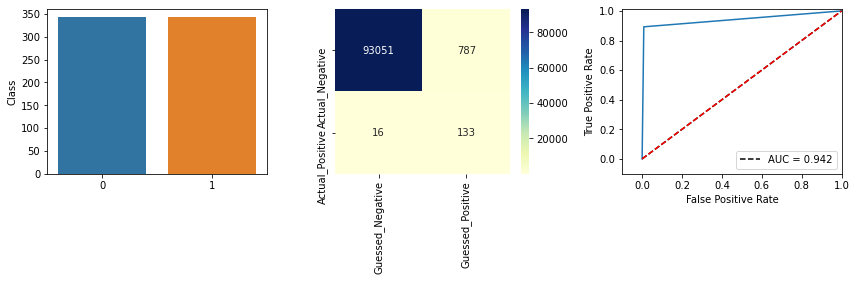

Area Under the Curve: 0.94


In [8]:
rus = RandomUnderSampler(random_state=0) 
rus.fit(XN_train, yN_train) 
X_smn, y_smn = rus.fit_resample(XN_train, yN_train)
logist_regression(X_smn, y_smn, "RANDOM UNDER-sampling",XN_test, yN_test)

In [9]:
# PCA analysis
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])
print(pca.get_params())
print(principalComponents.shape)

{'copy': True, 'iterated_power': 'auto', 'n_components': 2, 'random_state': None, 'svd_solver': 'auto', 'tol': 0.0, 'whiten': False}
(284807, 2)


In [10]:
finalDf = pd.concat([principalDf, data['Class']], axis = 1)
print(finalDf.head())
print(pca.explained_variance_ratio_)
features = finalDf.columns
features = finalDf.columns

   principal_component_1  principal_component_2  Class
0               0.125725              -0.479107      0
1               0.386067               0.531411      0
2               0.324796              -0.044122      0
3               0.995606               1.076000      0
4               0.113791               0.677320      0
[0.10000819 0.10000457]


In [11]:
X_pca= finalDf[features].drop('Class',axis=1)
y_pca = finalDf['Class']
XP_train, XP_test, yP_train, yP_test = train_test_split(X_pca, y_pca, test_size=0.33, random_state=42)

686
Fitting 3 folds for each of 12 candidates, totalling 36 fits
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     93838
           1       0.03      0.85      0.06       149

    accuracy                           0.96     93987
   macro avg       0.51      0.90      0.52     93987
weighted avg       1.00      0.96      0.98     93987

[[89633  4205]
 [   22   127]]


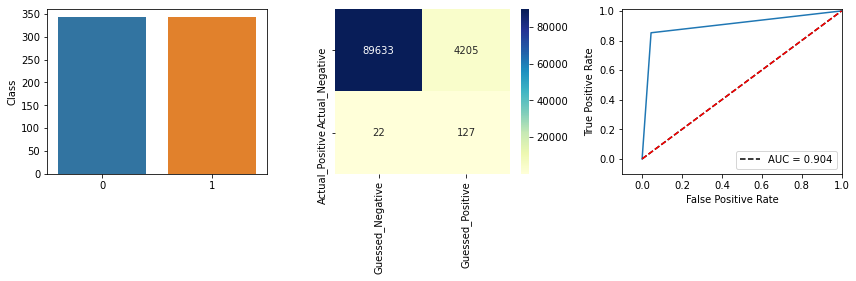

Area Under the Curve: 0.9


In [12]:
rus = RandomUnderSampler(random_state=0)
rus.fit(XP_train, yP_train)
X_pca, y_pca = rus.fit_resample(XP_train, yP_train)
print(len(X_pca))
logist_regression(X_pca, y_pca, "RANDOM UNDER-sampling",XP_test, yP_test)

In [13]:
#train the model logistic regression
model1 = LogisticRegression(random_state=2)
logit = model1.fit(XN_train, yN_train)

In [14]:
#logistic regression predictions
y_pred_logit = model1.predict(XN_test) 

In [15]:
#logistic regression scores
print("Accuracy Logit:",metrics.accuracy_score(yN_test, y_pred_logit))
print("Precision Logit:",metrics.precision_score(yN_test, y_pred_logit))
print("Recall Logit:",metrics.recall_score(yN_test, y_pred_logit))
print("F1 Score Logit:",metrics.f1_score(yN_test, y_pred_logit))

Accuracy Logit: 0.9992339366082543
Precision Logit: 0.8598130841121495
Recall Logit: 0.6174496644295302
F1 Score Logit: 0.7187499999999999


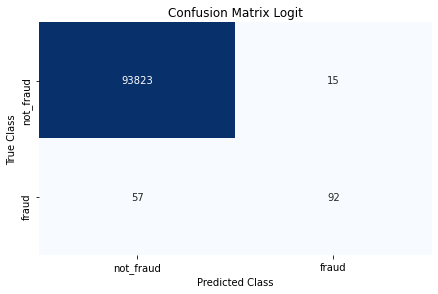

In [16]:

#print logistic regression CM
matrix_logit = confusion_matrix(yN_test, y_pred_logit)
cm_logit = pd.DataFrame(matrix_logit, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logit"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [17]:
#AUC value for logistic regression
y_pred_logit_proba = model1.predict_proba(XN_test)[::,1]
fpr_logit, tpr_logit, _ = metrics.roc_curve(yN_test,  y_pred_logit_proba)
auc_logit = metrics.roc_auc_score(yN_test, y_pred_logit_proba)
print("AUC Logistic Regression :", auc_logit)

AUC Logistic Regression : 0.979455740587341


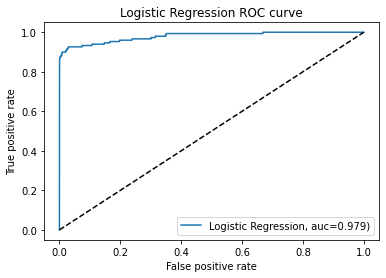

In [18]:
#ROC curve for logistic regression
plt.plot(fpr_logit,tpr_logit,label="Logistic Regression, auc={:.3f})".format(auc_logit))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc=4)
plt.show()

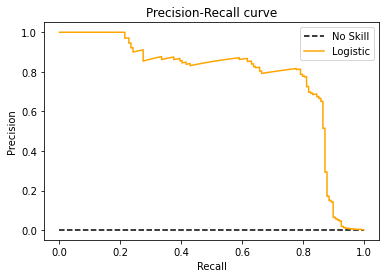

In [19]:
# Precision-Recall Curv for logistic regression
logit_precision, logit_recall, _ = precision_recall_curve(yN_test, y_pred_logit_proba)
no_skill = len(yN_test[yN_test==1]) / len(yN_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(logit_recall, logit_precision, color='orange', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

In [20]:
#train the model Multi Layer Perceptron
model5 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100,100), random_state=2)
mlp = model5.fit(XN_train, yN_train)

In [21]:
model5.get_params(deep=True)


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 100),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 2,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [22]:
#predictions Multi Layer Perceptron
y_pred_mlp = model5.predict(XN_test)

In [23]:
#scores Multi Layer Perceptron
print("Accuracy MLP:",metrics.accuracy_score(yN_test, y_pred_mlp))
print("Precision MLP:",metrics.precision_score(yN_test, y_pred_mlp))
print("Recall MLP:",metrics.recall_score(yN_test, y_pred_mlp))
print("F1 Score MLP:",metrics.f1_score(yN_test, y_pred_mlp))

Accuracy MLP: 0.9994573717641801
Precision MLP: 0.9152542372881356
Recall MLP: 0.7248322147651006
F1 Score MLP: 0.8089887640449437


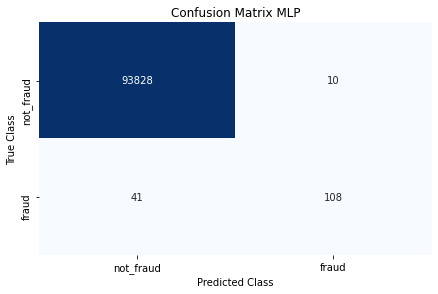

In [24]:
#CM matrix for Multi Layer Perceptron
matrix_mlp = confusion_matrix(yN_test, y_pred_mlp)
cm_mlp = pd.DataFrame(matrix_mlp, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_mlp, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix MLP"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

AUC MLP : 0.9703903528728863


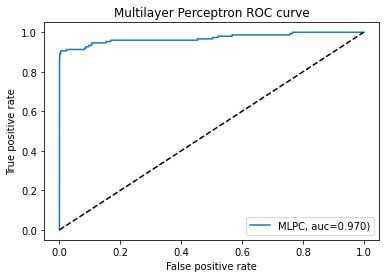

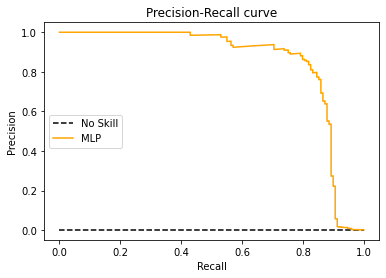

In [25]:
#AUC value for Multi Layer Perceptron
y_pred_mlp_proba = model5.predict_proba(XN_test)[::,1]
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(yN_test,  y_pred_mlp_proba)
auc_mlp = metrics.roc_auc_score(yN_test, y_pred_mlp_proba)
print("AUC MLP :", auc_mlp)
#ROC curve for Multi Layer Perceptron
plt.plot(fpr_mlp,tpr_mlp,label="MLPC, auc={:.3f})".format(auc_mlp))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Multilayer Perceptron ROC curve')
plt.legend(loc=4)
plt.show()
# Precision-Recall Curve for Multi Layer Perceptron
mlp_precision, mlp_recall, _ = precision_recall_curve(yP_test, y_pred_mlp_proba)
no_skill = len(yN_test[yN_test==1]) / len(yP_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(mlp_recall, mlp_precision, color='orange', label='MLP')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

Accuracy RF: 0.999574409226808
Precision RF: 0.957983193277311
Recall RF: 0.7651006711409396
F1 Score RF: 0.8507462686567164


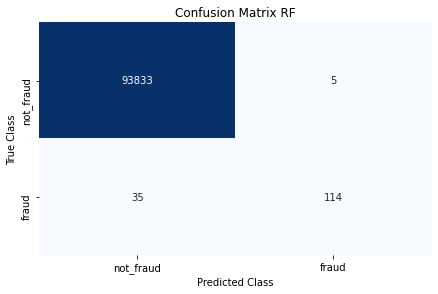

In [26]:
#train the model for random forest algorithm
model3 = RandomForestClassifier(random_state=2)
rf = model3.fit(XN_train, yN_train)
#predictions of for random forest
y_pred_rf = model3.predict(XN_test)
#scores of for random forest
print("Accuracy RF:",metrics.accuracy_score(yN_test, y_pred_rf))
print("Precision RF:",metrics.precision_score(yN_test, y_pred_rf))
print("Recall RF:",metrics.recall_score(yN_test, y_pred_rf))
print("F1 Score RF:",metrics.f1_score(yN_test, y_pred_rf))
#CM matrix for for random forest
matrix_rf = confusion_matrix(yN_test, y_pred_rf)
cm_rf = pd.DataFrame(matrix_rf, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_rf, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix RF"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [27]:
#AUC value for for random forest
y_pred_rf_proba = model3.predict_proba(XN_test)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(yN_test,  y_pred_rf_proba)
auc_rf = metrics.roc_auc_score(yN_test, y_pred_rf_proba)
print("AUC Random Forest :", auc_rf)

AUC Random Forest : 0.9619061824526661


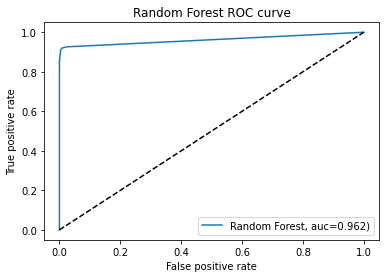

In [28]:
#ROC curve for for random forest
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc={:.3f})".format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc=4)
plt.show()


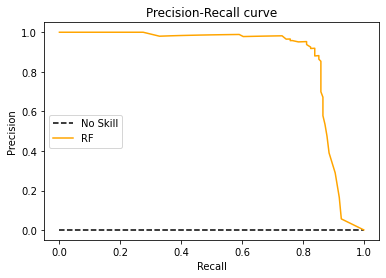

In [34]:
# Precision-Recall for random forest
rf_precision, rf_recall, _ = precision_recall_curve(yN_test, y_pred_rf_proba)
no_skill = len(yN_test[yN_test==1]) / len(yN_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(rf_recall, rf_precision, color='orange', label='RF')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

In [30]:
#train the model for SVM
model2 = SVC(probability=True, random_state=2)
svm = model2.fit(XN_train, yN_train)

In [31]:
#predictions by SVM
y_pred_svm = model2.predict(XN_test)


In [32]:
#scores of SVM
print("Accuracy SVM:",metrics.accuracy_score(yN_test, y_pred_svm))
print("Precision SVM:",metrics.precision_score(yN_test, y_pred_svm))
print("Recall SVM:",metrics.recall_score(yN_test, y_pred_svm))
print("F1 Score SVM:",metrics.f1_score(yN_test, y_pred_svm))
#CM matrix for SVM
matrix_svm = confusion_matrix(yN_test, y_pred_svm)
cm_svm = pd.DataFrame(matrix_svm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

Accuracy SVM: 0.9994892910721696
Precision SVM: 0.963302752293578
Recall SVM: 0.7046979865771812
F1 Score SVM: 0.813953488372093


AUC SVM : 0.954083440388698


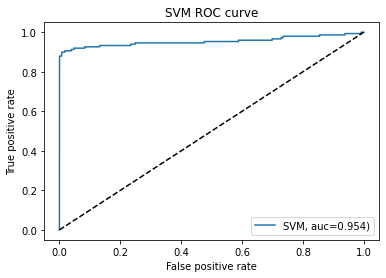

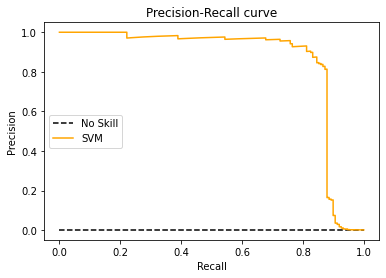

In [33]:
#AUC value for SVM
y_pred_svm_proba = model2.predict_proba(XN_test)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(yN_test,  y_pred_svm_proba)
auc_svm = metrics.roc_auc_score(yN_test, y_pred_svm_proba)
print("AUC SVM :", auc_svm)
#ROC curve for SVM
plt.plot(fpr_svm,tpr_svm,label="SVM, auc={:.3f})".format(auc_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc=4)
plt.show()
# Precision-Recall for SVM
svm_precision, svm_recall, _ = precision_recall_curve(yN_test, y_pred_svm_proba)
no_skill = len(yN_test[yN_test==1]) / len(yN_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(svm_recall, svm_precision, color='orange', label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()